# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [62]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
weather_df = pd.DataFrame()

base_url = "https://api.openweathermap.org/data/2.5/weather?"

params = {
    "APPID" : api_keys.api_key,
    "units" : "imperial"
}

print("Beginning Data Retrieval ")

index =1
for city in cities:
    params["q"] = city
    
    print("Processing Record " + str(index) + " of Set 1 | " + city)
    response = requests.get(base_url, params=params).json()
          
    try:
        weather_df.loc[index, 'City'] = response["name"]
        weather_df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        weather_df.loc[index, 'Country'] = response["sys"]["country"]
        weather_df.loc[index, 'Date'] = response["dt"]
        weather_df.loc[index, 'Humidity'] = response["main"]["humidity"]
        weather_df.loc[index, 'Lat'] = response["coord"]["lat"]
        weather_df.loc[index, 'Lng'] = response["coord"]["lon"]        
        weather_df.loc[index, 'Max Temp'] = response["main"]["temp_max"]      
        weather_df.loc[index, 'Wind Speed'] = response["wind"]["speed"]
              
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    index = index + 1
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")    
  

Beginning Data Retrieval 
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | coihaique
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | bardiyah
City not found. Skipping...
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | toliary
City not found. Skipping...
Processing Record 14 of Set 1 | sucua
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | jati
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | mangrol
Processing Record 22 of Set 1 | bengkulu
Cit

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
weather_df.to_csv("City_data.csv")
weather_df.count()

City          526
Cloudiness    526
Country       526
Date          526
Humidity      526
Lat           526
Lng           526
Max Temp      526
Wind Speed    526
dtype: int64

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [76]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Avarua,75.0,CK,1.547658e+09,88.0,-21.21,-159.78,77.00,5.82
2,Sao Filipe,0.0,CV,1.547659e+09,93.0,14.90,-24.50,73.22,14.12
3,Lompoc,1.0,US,1.547659e+09,71.0,34.64,-120.46,60.08,12.75
4,Coihaique,20.0,CL,1.547658e+09,41.0,-45.58,-72.07,60.80,10.29
5,Port Alfred,100.0,ZA,1.547659e+09,90.0,-33.59,26.89,71.91,21.50


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

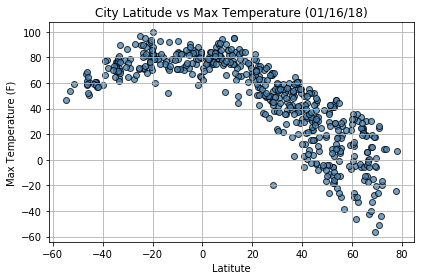

In [90]:
x = weather_df["Lat"].tolist()
y = weather_df["Max Temp"].tolist()

plt.scatter(x,y, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)

#plt.scatter(x=weather_df["Lat"],y=weather_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs Max Temperature (01/16/18)")
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

plt.savefig("../Images/LatVsMaxtemp.png")

plt.show

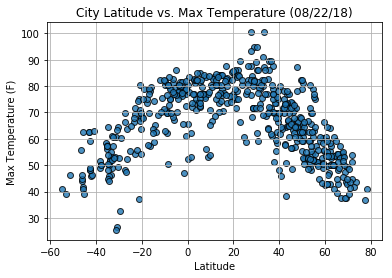

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

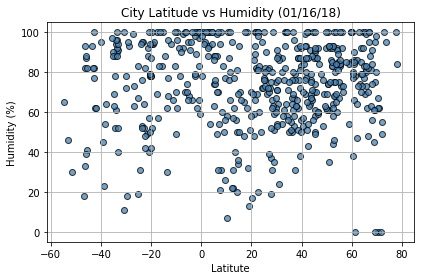

In [91]:
y = weather_df["Humidity"].tolist()

plt.scatter(x,y,marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs Humidity (01/16/18)")
plt.xlabel("Latitute")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

plt.savefig("../Images/LatVsHumidity.png")

plt.show

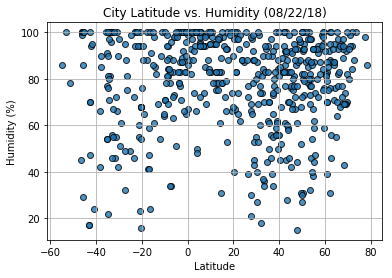

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

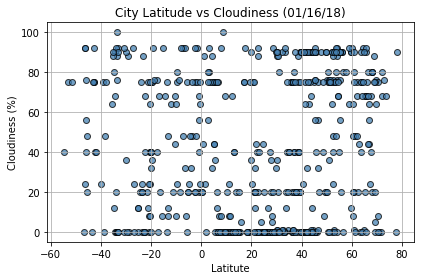

In [89]:
y = weather_df["Cloudiness"].tolist()

plt.scatter(x,y,marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs Cloudiness (01/16/18)")
plt.xlabel("Latitute")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

plt.savefig("../Images/LatVsCloudiness.png")

plt.show

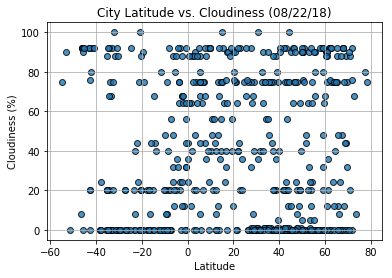

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

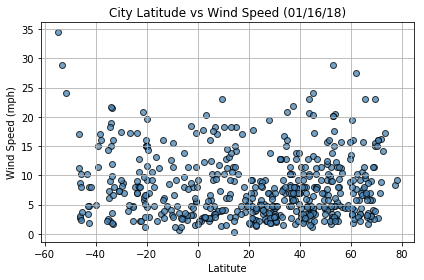

In [85]:
y = weather_df["Wind Speed"].tolist()

plt.scatter(x,y,marker="o", facecolors="steelblue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs Wind Speed (01/16/18)")
plt.xlabel("Latitute")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

plt.savefig("../Images/LatVsWindspeed.png")

plt.show

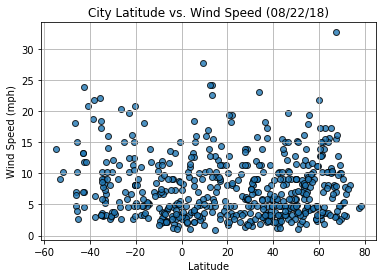

In [ ]:
#junk catcher cell. Not to be executed....


#response = requests.get("https://api.openweathermap.org/data/2.5/weather?q=London,Chicago&APPID=xxx&units=imperial")
response = requests.get(f'{base_url}London,uk&APPID={api_keys.api_key}&units=imperial')
#print(f'{base_url}ahipara&APPID={api_keys}')
#print(response.json())

#cities[1:5]
temp = []
temp.append(jresponse["main"]["temp"])
print(temp)
lat = jresponse["coord"]["lat"]
humid = jresponse["main"]["humidity"]
cloud = jresponse["clouds"]["all"]
windSpeed = jresponse["wind"]["speed"]

#print(lat)
#print(humid)
#print(cloud)
#print(windSpeed)


base_url = "https://api.openweathermap.org/data/2.5/weather?q="
units =  "imperial"

temp = []
lat = []
humid = []
cloud = []
windSpeed = []

print("Beginning Data Retrieval")

for city in cities :        
    
    response = requests.get(f'{base_url}{city}={api_keys.api_key}&units=imperial')
    data = response.json()
    temp.append(data["main"]["temp"])
    lat.append(data["coord"]["lat"])
    humid.append(data["main"]["humidity"])
    cloud.append(data["clouds"]["all"])
    windSpeed.append(data["wind"]["speed"])
 
City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
mya = requests.get("https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=c434b815bdf9be521475dd0e4e80b40e&units=imperial")
mya = mya.json()
co = mya["sys"]["country"]
print(co)
da = mya["dt"]
print(da)
MT = mya["main"]["temp_max"]
print(MT)

weather_df = pd.DataFrame(cities, columns=["City"])
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

base_url = "https://api.openweathermap.org/data/2.5/weather?"

params = {
    "APPID" : api_keys.api_key,
    "units" : "imperial"
}

print("Beginning Data Retrieval ")

for index, row in weather_df.iterrows():
    params["q"] = row["City"]
    
    print("Processing Record " + str(index) + " of Set 1 | " + params["q"])
    response = requests.get(base_url, params=params).json()
          
    try:
        weather_df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        weather_df.loc[index, 'Country'] = response["sys"]["country"]
        weather_df.loc[index, 'Date'] = response["dt"]
        weather_df.loc[index, 'Humidity'] = response["main"]["humidity"]
        weather_df.loc[index, 'Lat'] = response["coord"]["lat"]
        weather_df.loc[index, 'Lng'] = response["coord"]["lon"]        
        weather_df.loc[index, 'Max Temp'] = response["main"]["temp_max"]      
        weather_df.loc[index, 'Wind Speed'] = response["wind"]["speed"]
              
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")    
weather_df.head(5) 